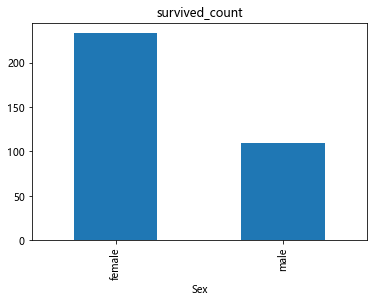

In [1]:
# 加载所需的库
# 如果出现 ModuleNotFoundError: No module named 'xxxx'
# 你只需要在终端/cmd下 pip install xxxx 即可
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

text = pd.read_csv('F:/Titanic/train.csv')
sex = text.groupby('Sex')['Survived'].sum()
sex.plot.bar()
plt.title('survived_count')
plt.show()

Text(0, 0.5, 'count')

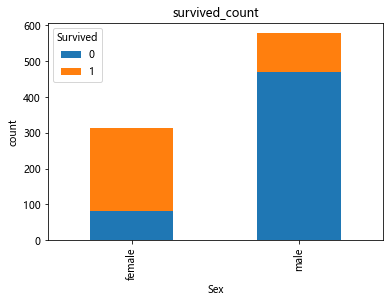

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

text = pd.read_csv('F:/Titanic/train.csv')
text.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('survived_count')
plt.ylabel('count')

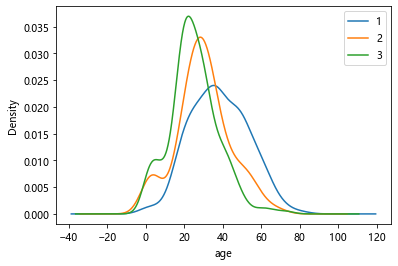

In [3]:
text.Age[text.Pclass == 1].plot(kind='kde')
text.Age[text.Pclass == 2].plot(kind='kde')
text.Age[text.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")

2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）
【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

In [4]:
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡
fare_sur = text.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
fare_sur

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
13.0000  1           16
                     ..
7.7417   0            1
26.2833  1            1
7.7375   1            1
26.3875  1            1
22.5250  0            1
Name: Survived, Length: 330, dtype: int64

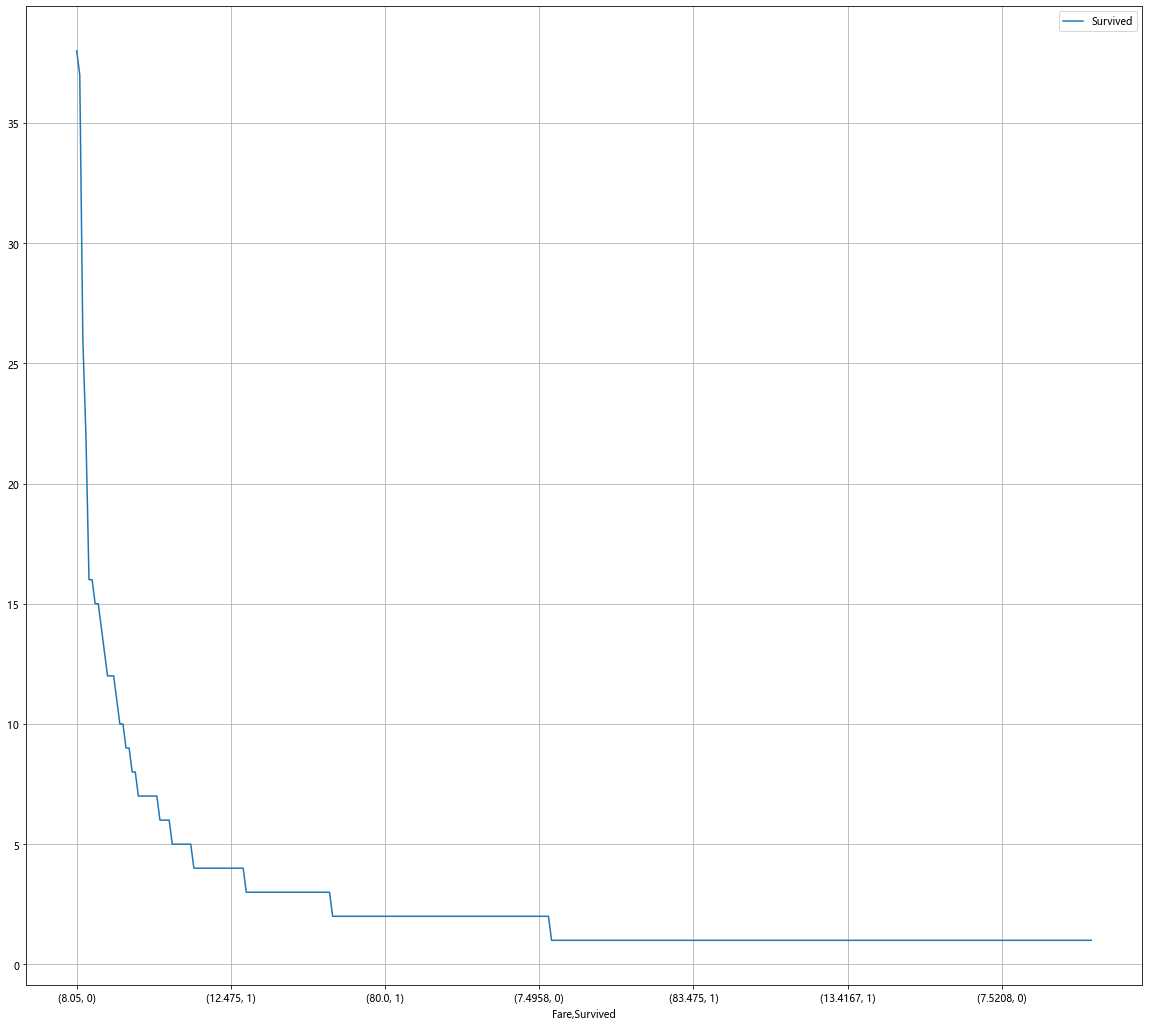

In [5]:
# 排序后绘折线图
fig = plt.figure(figsize=(20, 18))
fare_sur.plot(grid=True)
plt.legend()
plt.show()

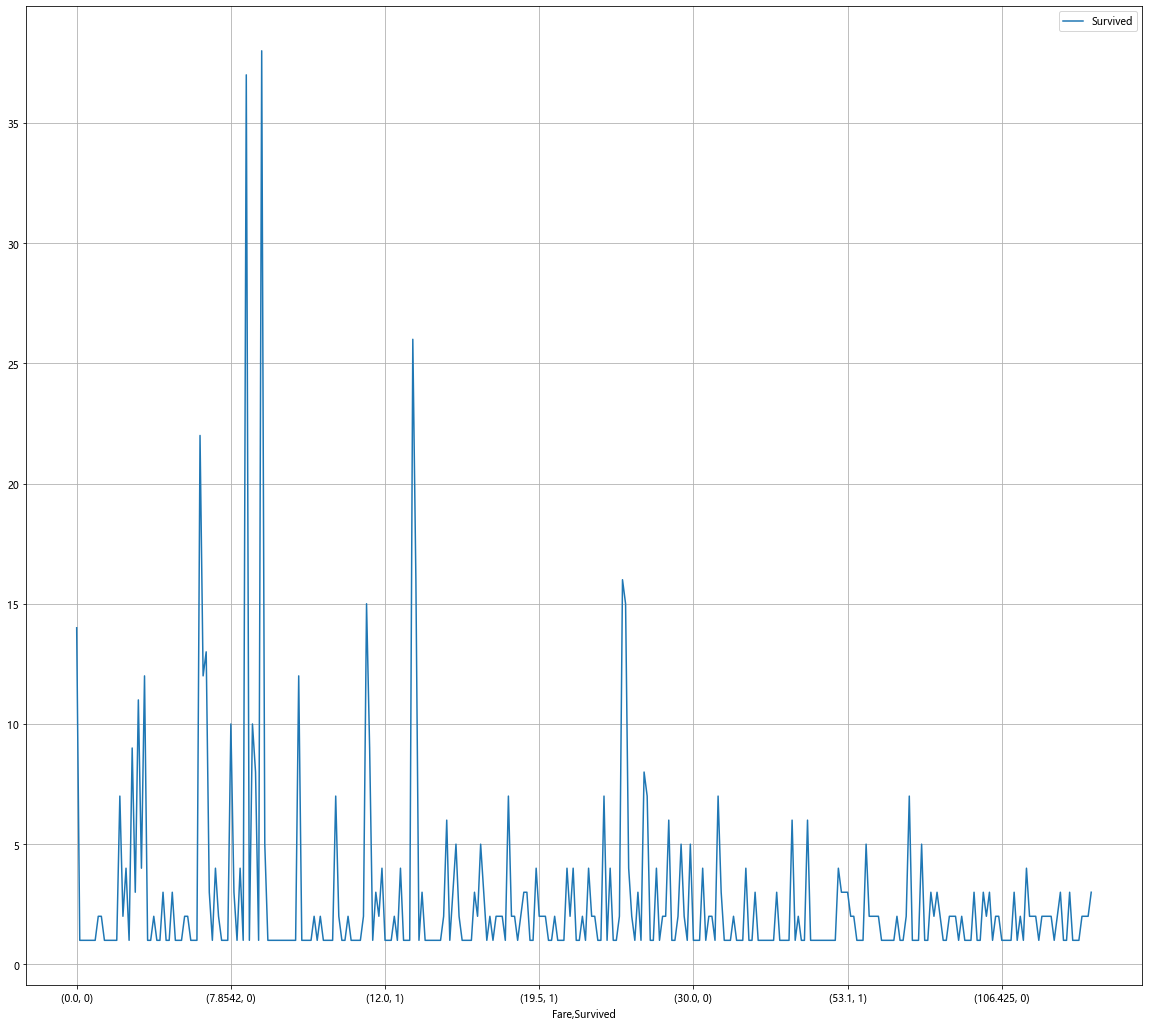

In [8]:
fare_sur1 = text.groupby(['Fare'])['Survived'].value_counts()
fare_sur1
fig = plt.figure(figsize=(20, 18))
fare_sur1.plot(grid=True)
plt.legend()
plt.show()

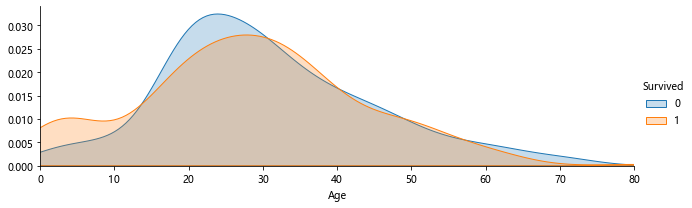

In [10]:
import seaborn as sns
facet = sns.FacetGrid(text, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, text['Age'].max()))
facet.add_legend()
